# 자연어처리 과제 1 (3주차)
* 과제는 해당 .ipynb 파일에 코드 작성
    * **코드는 google colab의 gpu를 사용하는 런타임 환경에서 모두실행을 통해 한번에 실행 되어야함**
    * 생성형 AI (ChatGPT, Copilot, Claude, ...) 등 사용 가능
        * 단, 사용시 사용한 방법, 입력, 출력을 캡처해 보고서에 기입
* Word를 통해 자유형식으로 보고서를 작성
    * 보고서의 양식은 자유
    * 보고서의 제출은 .pdf 형식으로 제출해야하며, 파일명은 "학번_이름_HW_??.pdf"로 제출 할 것
    * 보고서에 코드를 그대로 복붙 하지 말 것 (캡처 도구를 활용, 환경 설치 자료 참고)
* .ipynb와 .pdf 파일을 el을 통해 제출
    * 예시 : "2232036006_임상훈_HW_01.ipynb"와 "2232036006_임상훈_HW_01.pdf"를 제출

In [ ]:
!pip install lightning wandb nltk

## 1. 영어로된 영화 리뷰 데이터 전처리 (40점)

* Kaggle에서 제공하는 Movie Review Dataset(https://www.kaggle.com/datasets/vipulgandhi/movie-review-dataset?resource=download)를 전처리하여 Vocab을 구성하시오.

    * 제공되는 코드는 해당 데이터를 실습에 사용한 NSMC 데이터의 형식으로 바꾸어주는 코드이다.
        * 단, 실습과 달리 train, val, test의 세 부분으로 나누어짐
    * Vocab 구성시 Whitespace tokenizer를 사용하여야 하며, Data cleaning, Text cleaning 과정을 거치지 않은 기본 Vocab을 생성하시오

**GRADING**
* Vocab 구현에 성공(+40)

In [ ]:
from pathlib import Path

raw_data_dir = "/content/drive/MyDrive/24-1 자연어처리/data/archive/txt_sentoken"  # 상기 링크를 통해 다운받은 데이터를 압축해제한 디렉토리 경로 (경로 설정)
data_dir = Path(raw_data_dir)

train_datas = []
val_datas = []
test_datas = []

for sentiment in ["pos", "neg"]:
    samples = list(data_dir.glob(f"{sentiment}/*.txt"))
    train_datas.extend(samples[:int(0.7 * len(samples))])
    val_datas.extend(samples[int(0.7 * len(samples)):int(0.85 * len(samples))])
    test_datas.extend(samples[int(0.85 * len(samples)):])

train_file = open("train.txt", "w")
val_file = open("val.txt", "w")
test_file = open("test.txt", "w")

# dataset 그룹화 진행
for file, datas in [(train_file, train_datas), (val_file, val_datas), (test_file, test_datas)]:
    file.write("id\ttext\tlabel\n")
    for data in datas:
        lines = [line.strip() for line in data.open().readlines()]
        text = " ".join(lines)
        id = data.name[:-4]
        label = 1 if "pos" in data.parts else 0
        file.write(f"{id}\t{text}\t{label}\n")

train_file.close()
val_file.close()
test_file.close()


In [ ]:
# Build Your Own Vocabulary

In [ ]:
## data 읽어오기
from requests import get
from os.path import exists

# 파일이 있으면 파일을 읽어온다.
def download(url, filename):
    if exists(filename): # file
        print(f"{filename} already exists")
    else:
        with open(filename, "wb") as file:
            response = get(url) # url
            file.write(response.content)

# 가져온 dataset 읽기
with open("train.txt", "r") as file:
    for i in range(5):
        print(file.readline())

with open("train.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    train_data = [line.split("\t") for line in lines if len(line) > 0]

with open("val.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    val_data = [line.split("\t") for line in lines if len(line) > 0]

with open("test.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    test_data = [line.split("\t") for line in lines if len(line) > 0]

id	text	label

cv004_11636	moviemaking is a lot like being the general manager of an nfl team in the post-salary cap era -- you've got to know how to allocate your resources . every dollar spent on a free-agent defensive tackle is one less dollar than you can spend on linebackers or safeties or centers . in the nfl , this leads to teams like the detroit lions , who boast a superstar running back with a huge contract , but can only field five guys named herb to block for him . in the movies , you end up with films like " spawn " , with a huge special-effects budget but not enough money to hire any recognizable actors . jackie chan is the barry sanders of moviemaking . he spins and darts across the screen like sanders cutting back through the defensive line . watching jackie in operation condor as he drives his motorcycle through the crowded streets of madrid , fleeing an armada of pursuers in identical black compact cars , is reminiscent of sanders running for daylight with the chicago 

In [ ]:
def check_vocab_properties(vocab):
    print(f"Vocab size: {len(vocab)}") #vocab size 길이 반환
    print(f"Vocab items: {list(vocab.items())[:5]}") # vocab에 어떤 data가 있는지

In [ ]:
# Whitespace tokenizer를 통해 기본 Vocab 만들기
from collections import Counter
from tqdm import tqdm

# white space vocab 만들기
whitespace_vocab = {"[PAD]":0, "[UNK]":1}
whitespace_vocab_idx = 2

# 공백을 기준으로 token 생성
tokenizer = lambda x: x.split()

tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

# train/test data에 대한 tokenizer을 수행한다.
for data in train_data:
    tokens = tokenizer(data[1])
    labels = data[2]
    tokenized_train_dataset.append((tokens, labels))

for data in val_data:
    tokens = tokenizer(data[1])
    labels = data[2]
    tokenized_val_dataset.append((tokens, labels))

for data in test_data:
    tokens = tokenizer(data[1])
    labels = data[2]
    tokenized_test_dataset.append((tokens, labels))

for tokens, _ in tokenized_train_dataset:
    for token in tokens:
        if token not in whitespace_vocab:
            whitespace_vocab[token] = whitespace_vocab_idx
            whitespace_vocab_idx += 1

**whitespace vocab 구축**

In [ ]:
check_vocab_properties(whitespace_vocab)

Vocab size: 42670
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('moviemaking', 2), ('is', 3), ('a', 4)]


**Index가 0 ~ 19에 존재하는 단어를 추출하여 확인하기**

In [ ]:
# 20개의 단어 추출
list(whitespace_vocab.items())[:20]

[('[PAD]', 0),
 ('[UNK]', 1),
 ('moviemaking', 2),
 ('is', 3),
 ('a', 4),
 ('lot', 5),
 ('like', 6),
 ('being', 7),
 ('the', 8),
 ('general', 9),
 ('manager', 10),
 ('of', 11),
 ('an', 12),
 ('nfl', 13),
 ('team', 14),
 ('in', 15),
 ('post-salary', 16),
 ('cap', 17),
 ('era', 18),
 ('--', 19)]

## 2. 영어로된 영화 리뷰 데이터 분류 모델 학습 (30점)
* 실습에 사용한 모델 및 Dataset 객체를 통해 긍정 부정 분류 모델을 학습하시오.
    * 실습코드와 동일한 구조의 모델을 사용해야함
    * 실습코드와 동일한 Trainer 및 하이퍼 파라미터를 유지해야함
    * **Train, Validation, Test 데이터를 모두 학습에 알맞게 사용할 것**

**GRADING**
* 모델 구현 및 학습 (+25)
* Train, Validation, Test를 알맞게 사용 (+5)

In [ ]:
# Train Models

**모델 생성**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# model 생성
class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, 32)
        self.fc1 = nn.Linear(32 * 100, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(-1, 32 * 100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
import lightning as pl

class SentimentClassifierPL(pl.LightningModule):
    def __init__(self, sentiment_classifier):
        super(SentimentClassifierPL, self).__init__()
        self.model = sentiment_classifier #model
        self.loss = nn.CrossEntropyLoss() #loss function

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.save_hyperparameters() #hyperparameter 자동 조정

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels) #loss 계산
        self.log("train_loss", loss) #wandb에 log 저장하는 code
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("val_loss", loss)
        self.validation_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    # validation epoch이 끝났을 때 수행하는 함수
    # validation 전체 loss 및 accuracy를 구하는 함수
    def on_validation_epoch_end(self):
        outputs = self.validation_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean() #loss 평균 구하기
        self.log("avg_val_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        # 예측값과 실제값 사이 비교 수행
        accuracy = (all_preds == all_labels).float().mean()
        self.log("val_accuracy", accuracy)
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("test_loss", loss)
        self.test_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_test_epoch_end(self):
        outputs = self.test_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_test_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("test_accuracy", accuracy)
        self.test_step_outputs.clear()

    # otimizer로 수행할 수 있는 것들 자동으로 해준다.
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3) #Adam 최적화 알고리즘 사용, 학습률 조정
        return optimizer

In [ ]:
from torch.utils.data import Dataset, DataLoader

# Tokeninizing된 Data를 Input으로 받는다.
class SentimentDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    # TOkeninizing된 Data
    # 수행 과정: 하나의 text data에 대해서 vocabulary에 있는 인덱스를 mapping한다.
    # mapping 할 때, 시퀀스 길이를 초과하면 truncating 수행
    # 반대면 padding 작업 수행
    def __getitem__(self, index):
        label = int(self.data[index][1]) #현재 인덱스에 해당하는 데이터 샘플 정답
        tokens = self.data[index][0] #token화된 text data

        # vocab에 token이 있으면 ID를 반환하고 아니면 1을 반환한다.
        # 1은 대부분 [UNK] 특수 토큰의 ID를
        token_ids = [self.vocab[token] if token in self.vocab else 1 for token in tokens]

        # Padding 수행 (token 시퀀스 길이 맞추기)
        # token id 개수가 100개를 초과하면 처음 100개만 사용한다.
        if len(token_ids) > 100:
            token_ids = token_ids[:100]
        # sequence 길이가 100이 안되면 0으로 padding 추가
        else:
            token_ids = token_ids[:100] + [0] * (100 - len(token_ids))

        return torch.tensor(token_ids), torch.tensor(label)

In [ ]:
import wandb
from lightning.pytorch.loggers import WandbLogger

wandb.login()

# 학습 수행
def check_performance(vocab,train_data, val_data, test_data, wandb_log_name):
  # grouping을 통해서 현재 실험들을 wandb에서 한 눈에 볼 수 있도록 한다.
    wandb_logger = WandbLogger(project="NLP_Week3", name=wandb_log_name, group="Lec02_Assignment")

    # 감정 분류 모델
    model = SentimentClassifier(len(vocab))
    # PytorchLighting을 사용하기 위해 model을 감싸준다.
    pl_model = SentimentClassifierPL(model)

    train_dataset = SentimentDataset(train_data, vocab)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_dataset = SentimentDataset(val_data, vocab)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_dataset = SentimentDataset(test_data, vocab)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

    trainer = pl.Trainer(max_epochs=1,
                     accelerator="cpu", #gpu 할당량이 끝나버렸어요 ..
                     logger=wandb_logger
                     )

    trainer.fit(model=pl_model,
                train_dataloaders=train_loader,
                val_dataloaders=val_loader)

    trainer.test(dataloaders=test_loader)

    wandb.finish()

wandb: Currently logged in as: ahyeon24 (koreatech). Use `wandb login --relogin` to force relogin


**whitespace vocab을 사용하여 modeling 수행**

In [ ]:
check_performance(whitespace_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "whitespace")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using

INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.7 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.743     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.7 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.743     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/zjgxflcb/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/zjgxflcb/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/zjgxflcb/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/zjgxflcb/checkpoints/epoch=0

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7145856618881226     │
│       test_accuracy       │    0.5166666507720947     │
│         test_loss         │    0.7119462490081787     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.71459
avg_val_loss,0.72189
epoch,1


**성능**

Test Accuracy : 51.33%

## 3. Vocab 개선 (30점)
* 상기 구축한 Vocab을 최적화 하여 모델의 성능을 개선하시오
    * 남이 구축한 Vocab을 가져오는 것을 제외, 모든 것을 허용
* 참고하면 좋은 것
    * 영어의 불용어(Stopword) : https://gist.github.com/sebleier/554280
    * 영어에 적합한 Tokenizer : NLTK 라이브러리 참고 (https://www.nltk.org/api/nltk.tokenize.html)
    * 영어의 lemmatizing 및 stemming : NLTK 라이브러리를 참고 (https://www.nltk.org/api/nltk.stem.html)
    * Regular Expression 사용시 유용한 사이트 : https://regexr.com/

**GRADING**
* 수업에 배운 내용을 적용 (+10)
* 적용된 Vocab을 통해 성능 개선 (+10)
* NLTK 등 외부 라이브러리의 tokenizer 및 다양한 정규화 기법을 사용 (+10)

In [ ]:
# Improve Your Model with Awesome Techniques

**참조. text 분석**

In [ ]:
# 등장빈도 알아보기
from collections import Counter

token_counter = Counter()

for tokens, _ in tokenized_train_dataset: # token vocab
    token_counter.update(tokens)

In [ ]:
len(token_counter)

42668

In [ ]:
 # method를 사용, count가 많은 것들 10개 출력
token_counter.most_common(10)

[(',', 54009),
 ('the', 53023),
 ('.', 46018),
 ('a', 26539),
 ('and', 24616),
 ('of', 23604),
 ('to', 22107),
 ('is', 17408),
 ('in', 15054),
 ('"', 12449)]

In [ ]:
token_counter.most_common()[-10:]

[('allegorically', 1),
 ('combing', 1),
 ("capote's", 1),
 ('true-crime', 1),
 ("change-i'll", 1),
 ('yourself-but', 1),
 ("movie-he's", 1),
 ('chandler/ross', 1),
 ('genre-last', 1),
 ('example-', 1)]

In [ ]:
import matplotlib.pyplot as plt

def plot_frequency_distribution(counter):
    plt.plot(counter.values())
    plt.ylabel('Token Frequency')
    plt.show()

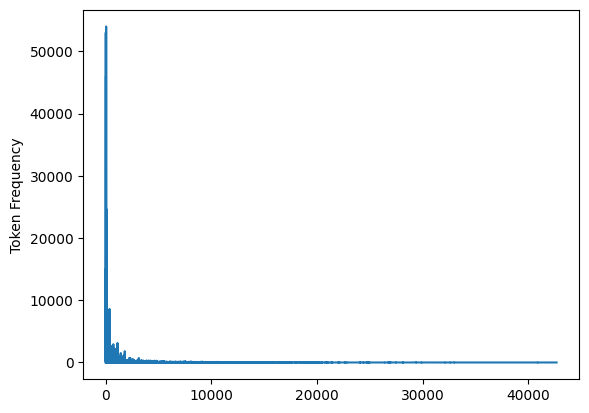

In [ ]:
plot_frequency_distribution(token_counter)

**Text 분석으로 알 수 있는 점**

(1) 역시 한국어 보다는 token의 수가 명확하게 줄은 것을 볼 수 있다.

(2) most common word를 보면, 조사와 특수문자가 대부분인 것을 확인할 수 있다.
→ NLTK로 조사 제거 진행

(3) 잘 안나오는 word를 보면, '-' 혹은 '/'로 단어들이 결합되어 있는 것을 확인할 수 있다.
→ 정규표현식으로 제거 진행

(4) word가 나오는 빈도 수를 보면, 극단적인 'L' 형태를 가지고 있는 것을 볼 수 있다.
→ 빈도수 제한 진행

**1번. 수업시간에 배운 내용 적용**

(1) 등장빈도가 1만 나오는 경우, 다 삭제한다.

(2) 정규표현식을 통한 필요없는 문자 제거

In [ ]:
# 1번. 빈도 수가 1인 경우, 제거 진행
min_count = 1
min1removed_vocab = {"[PAD]":0, "[UNK]":1}
min1removed_vocab_idx = 2

for token, count in token_counter.items():
    if count > min_count: # 빈도가 1보다 큰 값들만 vocab에 저장하겠다.
        min1removed_vocab[token] = min1removed_vocab_idx
        min1removed_vocab_idx += 1

In [ ]:
# 단어의 수가 절반정도 줄어든 것을 볼 수 있다.
check_vocab_properties(min1removed_vocab)

Vocab size: 23763
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('moviemaking', 2), ('is', 3), ('a', 4)]


In [ ]:
check_performance(min1removed_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "whitespace_min_count_1")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.1 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.323     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.1 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.323     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/knk52gr8/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/knk52gr8/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/knk52gr8/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/knk52gr8/checkpoints/epoch=0-step=22.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7340084314346313     │
│       test_accuracy       │    0.5066666603088379     │
│         test_loss         │    0.7343498468399048     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.73401
avg_val_loss,0.70077
epoch,1


**성능**

(1) whitespace tokenizer만 사용한 경우

Test Accuracy : 51.33%

(2) whitespace tokenizer + 빈도 수 제한

Test Accuracy : 49.33%

→ 예상 결과: data 수가 확연히 줄어들어 성능이 떨어졌다고 짐작한다.

In [ ]:
# 2번. 정규표현식 제거
import re

tokenizer = lambda x: x.split()

tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

for data in train_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1]) #특수문자 제거
    text = text.lower()  # 소문자 변환
    tokens = tokenizer(text)
    labels = data[2]
    tokenized_train_dataset.append((tokens, labels))

for data in val_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = tokenizer(text)
    labels = data[2]
    tokenized_val_dataset.append((tokens, labels))

for data in test_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = tokenizer(text)
    labels = data[2]
    tokenized_test_dataset.append((tokens, labels))

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

In [ ]:
len(token_counter)

34760

In [ ]:
token_counter.most_common(10)

[('the', 53216),
 ('a', 26640),
 ('and', 24786),
 ('of', 23700),
 ('to', 22245),
 ('is', 17432),
 ('in', 15222),
 ('s', 13047),
 ('it', 11343),
 ('that', 10989)]

In [ ]:
token_counter.most_common()[-10:]

[('eensy', 1),
 ('teensy', 1),
 ('squish', 1),
 ('unflushed', 1),
 ('kool', 1),
 ('slooooow', 1),
 ('bandages', 1),
 ('dt', 1),
 ('allegorically', 1),
 ('combing', 1)]

In [ ]:
cleaned_vocab = {"[PAD]":0, "[UNK]":1}
cleaned_vocab_idx = 2

for token, count in token_counter.items():
        cleaned_vocab[token] = cleaned_vocab_idx
        cleaned_vocab_idx += 1

In [ ]:
check_performance(cleaned_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "whitespace_cleaned")

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.4 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.731     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.4 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.731     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/yzbfgi6f/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/yzbfgi6f/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/yzbfgi6f/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/yzbfgi6f/checkpoints/epoch=0-step=22.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7210723161697388     │
│       test_accuracy       │    0.5099999904632568     │
│         test_loss         │    0.7227391004562378     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.72107
avg_val_loss,0.7291
epoch,1


**성능**

(1) whitespace tokenizer만 사용한 경우

Test Accuracy : 51.33%

(2) whitespace tokenizer + 빈도 수 제한

Test Accuracy : 49.33%

→ 예상 결과: data 수가 확연히 줄어들어 성능이 떨어졌다고 짐작한다.

(3) whitespace tokenizer + 정규표현식 사용

Test Accuracy : 54.67%

In [ ]:
# 빈도수가 1개밖에 안나오는 것들 제거
min_count = 1
cleaned_vocab_m1 = {"[PAD]":0, "[UNK]":1}
cleaned_vocab_m1_idx = 2

for token, count in token_counter.items():
    if count > min_count:
        cleaned_vocab_m1[token] = cleaned_vocab_m1_idx
        cleaned_vocab_m1_idx += 1

In [ ]:
check_vocab_properties(cleaned_vocab_m1)

Vocab size: 21963
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('moviemaking', 2), ('is', 3), ('a', 4)]


In [ ]:
check_performance(cleaned_vocab_m1, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "whitespace_mc1_cleaned")

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.0 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.092     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.0 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.092     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/19nxowxx/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/19nxowxx/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/19nxowxx/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/19nxowxx/checkpoints/epoch=0-step=22.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │     0.749871551990509     │
│       test_accuracy       │    0.4533333480358124     │
│         test_loss         │    0.7524503469467163     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.74987
avg_val_loss,0.73027
epoch,1


**성능**

(1) whitespace tokenizer만 사용한 경우

Test Accuracy : 51.33%

(2) whitespace tokenizer + 빈도 수 제한

Test Accuracy : 49.33%

→ 예상 결과: data 수가 확연히 줄어들어 성능이 떨어졌다고 짐작한다.

(3) whitespace tokenizer + 정규표현식 사용

Test Accuracy : 54.67%

(4) whitespace tokenizer + 정규표현식 사용 + 빈도 수 제한

Test Accuracy : 52.67%

**2번. stopword 적용**

(1) 영어의 불용어(Stopword) 사전 참조 : https://gist.github.com/sebleier/554280

(2) NLTK 라이브러리에서 제공하는 stopwords 사용

whitespace tokenizer과 정규표현식 사용한 것에 불용어 제거를 수행하였다.

In [ ]:
# 1번. 불용어 사전 참조
stopwords = []

# stopwords.txt 파일 열기
with open('stopwords.txt', 'r') as file:
    for line in file:
        stopwords.append(line.strip())

stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [ ]:
import re

tokenizer = lambda x: x.split()

tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

for data in train_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1]) #특수문자 제거
    text = text.lower()  # 소문자 변환
    tokens = tokenizer(text)
    stop_tokens = [token for token in tokens if token not in stopwords]
    labels = data[2]
    tokenized_train_dataset.append((stop_tokens, labels))

for data in val_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = tokenizer(text)
    stop_tokens = [token for token in tokens if token not in stopwords]
    labels = data[2]
    tokenized_val_dataset.append((stop_tokens, labels))

for data in test_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = tokenizer(text)
    stop_tokens = [token for token in tokens if token not in stopwords]
    labels = data[2]
    tokenized_test_dataset.append((stop_tokens, labels))

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

In [ ]:
stop_vocab = {"[PAD]":0, "[UNK]":1}
stop_vocab_idx = 2

for token, count in token_counter.items():
    # if token not in stopwords:
        stop_vocab[token] = stop_vocab_idx
        stop_vocab_idx += 1

In [ ]:
check_vocab_properties(stop_vocab)

Vocab size: 34635
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('moviemaking', 2), ('lot', 3), ('like', 4)]


In [ ]:
check_performance(stop_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "whitespace_stopwords")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using

INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.4 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.714     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.4 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.714     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/1nsqm7yf/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/1nsqm7yf/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/1nsqm7yf/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/1nsqm7yf/checkpoints/epoch=0

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7256492376327515     │
│       test_accuracy       │    0.49666666984558105    │
│         test_loss         │    0.7239922881126404     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.72565
avg_val_loss,0.70537
epoch,1


**성능**

(1) stopwords.txt 사용한 경우

Test Accuracy : 45.67%


In [ ]:
# 2번. nltk stopwords 사용한 경우

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))

In [ ]:
import re

tokenizer = lambda x: x.split()

tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

for data in train_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1]) #특수문자 제거
    text = text.lower()  # 소문자 변환
    tokens = tokenizer(text)
    stop_tokens = [token for token in tokens if token not in english_stops]
    labels = data[2]
    tokenized_train_dataset.append((stop_tokens, labels))

for data in val_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = tokenizer(text)
    stop_tokens = [token for token in tokens if token not in english_stops]
    labels = data[2]
    tokenized_val_dataset.append((stop_tokens, labels))

for data in test_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = tokenizer(text)
    stop_tokens = [token for token in tokens if token not in english_stops]
    labels = data[2]
    tokenized_test_dataset.append((stop_tokens, labels))

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

In [ ]:
stop_eng_vocab = {"[PAD]":0, "[UNK]":1}
stop_eng_vocab_idx = 2

for token, count in token_counter.items():
      stop_eng_vocab[token] = stop_eng_vocab_idx
      stop_eng_vocab_idx += 1

In [ ]:
check_vocab_properties(stop_eng_vocab)

In [ ]:
check_performance(stop_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "whitespace_nltk_stopwords")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using

INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.4 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.714     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.4 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.714     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/ef7n3vz3/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/ef7n3vz3/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/ef7n3vz3/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/ef7n3vz3/checkpoints/epoch=0

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7249812483787537     │
│       test_accuracy       │    0.5299999713897705     │
│         test_loss         │    0.7244855165481567     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.72498
avg_val_loss,0.75091
epoch,1


**성능**

(1) stopwords.txt 사용한 경우

Test Accuracy : 45.67%

(2) NLTK stopwords 사용한 경우

Test Accuracy : 52.00%

**3번. NLTK 적용**

Nltk tokenize은 무조건 적용하기


(1) Lemmatizer 사용

(2) Porter Stemmer 적용 (원형 찾음)

(3) Pos Tagging 사용하기


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# 1번. 표제어 추출 - Lemmatization 사용
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

for data in train_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1]) #특수문자 제거
    text = text.lower()  # 소문자 변환
    tokens = word_tokenize(text) #nltk tokenizer 적용
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatizer 적용
    stop_tokens = [token for token in lemmatized_tokens if token not in english_stops] # 불용어 제거
    labels = data[2]
    tokenized_train_dataset.append((stop_tokens, labels))

for data in val_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stop_tokens = [token for token in lemmatized_tokens if token not in english_stops]
    labels = data[2]
    tokenized_val_dataset.append((stop_tokens, labels))

for data in test_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stop_tokens = [token for token in lemmatized_tokens if token not in english_stops]
    labels = data[2]
    tokenized_test_dataset.append((stop_tokens, labels))

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

In [ ]:
lem_vocab = {"[PAD]":0, "[UNK]":1}
lem_vocab_idx = 2

for token, count in token_counter.items():
      lem_vocab[token] = lem_vocab_idx
      lem_vocab_idx += 1

In [ ]:
check_vocab_properties(lem_vocab)

In [ ]:
check_performance(lem_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "lemmatizer_nltk")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: 

INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.3 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.184     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.3 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.184     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/0gwf2j8z/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/0gwf2j8z/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/0gwf2j8z/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/0gwf2j8z/checkpoints/epoch=0

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │     0.765378475189209     │
│       test_accuracy       │    0.4699999988079071     │
│         test_loss         │    0.7657430171966553     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.76538
avg_val_loss,0.73938
epoch,1


In [ ]:
# 2번. Porter Stemmer 적용
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

for data in train_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1]) #특수문자 제거
    text = text.lower()  # 소문자 변환
    tokens = word_tokenize(text) #nltk tokenizer 적용
    stem_tokens = [stemmer.stem(token) for token in tokens] #PorterStemmer 적용
    stop_tokens = [token for token in stem_tokens if token not in english_stops] # 불용어 제거
    labels = data[2]
    tokenized_train_dataset.append((stop_tokens, labels))

for data in val_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    stem_tokens = [stemmer.stem(token) for token in tokens]
    stop_tokens = [token for token in stem_tokens if token not in english_stops]
    labels = data[2]
    tokenized_val_dataset.append((stop_tokens, labels))

for data in test_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    stem_tokens = [stemmer.stem(token) for token in tokens]
    stop_tokens = [token for token in stem_tokens if token not in english_stops]
    labels = data[2]
    tokenized_test_dataset.append((stop_tokens, labels))

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

In [ ]:
stem_vocab = {"[PAD]":0, "[UNK]":1}
stem_vocab_idx = 2

for token, count in token_counter.items():
      stem_vocab[token] = stem_vocab_idx
      stem_vocab_idx += 1

In [ ]:
check_vocab_properties(stem_vocab)

Vocab size: 22734
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('moviemak', 2), ('lot', 3), ('like', 4)]


In [ ]:
check_performance(stem_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "stemmer_nltk")

INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.0 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.191     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.0 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.191     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/2u6do8va/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/2u6do8va/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/2u6do8va/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/2u6do8va/checkpoints/epoch=0-step=22.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7052566409111023     │
│       test_accuracy       │     0.54666668176651      │
│         test_loss         │    0.7012516260147095     │
└───────────────────────────┴───────────────────────────┘

wandb: ERROR Control-C detected -- Run data was not synced


**성능**

(1) Lemmatizer 사용

Test accuracy :  50.67%

(2) Porter Stemmer 적용 (원형 찾음)

Test accuracy : 54.67

In [ ]:
# 3번. pos tagging 사용하기
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

my_tag_set = ['NN', 'VB', 'JJ'] #명사, 동사, 형용사만 가져온다.

In [ ]:
import re

tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

for data in train_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1]) #특수문자 제거
    text = text.lower()  # 소문자 변환
    tokens = word_tokenize(text) #nltk tokenizer 적용
    pos_tokens = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set] #원하는 품사만 가져옴
    stop_tokens = [token for token in pos_tokens if token not in english_stops] # 불용어 제거
    labels = data[2]
    tokenized_train_dataset.append((stop_tokens, labels))

for data in val_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    pos_tokens = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
    stop_tokens = [token for token in pos_tokens if token not in english_stops]
    labels = data[2]
    tokenized_val_dataset.append((stop_tokens, labels))

for data in test_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    pos_tokens = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
    stop_tokens = [token for token in pos_tokens if token not in english_stops]
    labels = data[2]
    tokenized_test_dataset.append((stop_tokens, labels))

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

In [ ]:
pos_vocab = {"[PAD]":0, "[UNK]":1}
pos_vocab_idx = 2

for token, count in token_counter.items():
      pos_vocab[token] = pos_vocab_idx
      pos_vocab_idx += 1

In [ ]:
check_vocab_properties(pos_vocab)

Vocab size: 23117
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('moviemaking', 2), ('lot', 3), ('general', 4)]


In [ ]:
check_performance(pos_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "pos_nltk")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: 

INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.1 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.240     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.1 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.240     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/6020x4t7/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/6020x4t7/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/6020x4t7/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/6020x4t7/checkpoints/epoch=0

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7605528831481934     │
│       test_accuracy       │            0.5            │
│         test_loss         │    0.7499040961265564     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.76055
avg_val_loss,0.7244
epoch,1


**성능**

(1) Lemmatizer 사용

Test accuracy :  50.67%

(2) Porter Stemmer 적용 (원형 찾음)

Test accuracy : 54.67%

(3) Pos Tagging 사용 (동사, 형용사, 명사 추출)

Test accuracy : 50.00%

**가장 성능이 좋았던 Data 정제 방식**

표제어 추출을 위한 Post Stemmer 사용하기

**[사용한 전처리 프로세스]**

nltk word tokenizer 사용

정규표현식을 활용한 특수문자 제거

대문자를 소문자로 대체

Post stemmer 사용

불용어(stopwords) 제거

성능(Test 정확도) : 54.67%

#### 추가. 실험적으로 다른 경우의 수도 생성해보기

**1번. 정규표현식을 사용하지 않았을 경우**

성능(Test 정확도) : 50.00%

**2번. stopwords를 제외하지 않은 경우**

성능(Test 정확도) : 50.00%


In [ ]:
#하나씩 없애면서 성능 다시 평가
tokenized_train_dataset = []
tokenized_val_dataset = []
tokenized_test_dataset = []

for data in train_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1]) #특수문자 제거
    text = text.lower()  # 소문자 변환
    tokens = word_tokenize(text) #nltk tokenizer 적용
    stem_tokens = [stemmer.stem(token) for token in tokens] #PorterStemmer 적용
    # stop_tokens = [token for token in stem_tokens if token not in english_stops] # 불용어 제거
    labels = data[2]
    tokenized_train_dataset.append((stem_tokens, labels))

for data in val_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    stem_tokens = [stemmer.stem(token) for token in tokens]
    # stop_tokens = [token for token in stem_tokens if token not in english_stops]
    labels = data[2]
    tokenized_val_dataset.append((stem_tokens, labels))

for data in test_data:
    text = re.sub(r'[,.!?;:()\"\'/-]', ' ', data[1])
    text = text.lower()
    tokens = word_tokenize(text)
    stem_tokens = [stemmer.stem(token) for token in tokens]
    # stop_tokens = [token for token in stem_tokens if token not in english_stops]
    labels = data[2]
    tokenized_test_dataset.append((stem_tokens, labels))

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

exp_vocab = {"[PAD]":0, "[UNK]":1}
exp_vocab_idx = 2

for token, count in token_counter.items():
      exp_vocab[token] = exp_vocab_idx
      exp_vocab_idx += 1

print(check_vocab_properties(pos_vocab))

#까먹지 말고 이름 변경하세요 ...  plz
check_performance(pos_vocab, tokenized_train_dataset, tokenized_val_dataset, tokenized_test_dataset, "no_stopwords_pos_nltk")

INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Vocab size: 23117
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('moviemaking', 2), ('lot', 3), ('general', 4)]
None


INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.1 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.240     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.1 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.240     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: Restoring states from the checkpoint path at ./NLP_Week3/9c4kgdpr/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Week3/9c4kgdpr/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP_Week3/9c4kgdpr/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Week3/9c4kgdpr/checkpoints/epoch=0-step=22.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.6937382817268372     │
│       test_accuracy       │            0.5            │
│         test_loss         │    0.6929938197135925     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.69374
avg_val_loss,0.69441
epoch,1


## 4. 왜 Vocab에 따라 성능이 달라지는가? (Bonus 20점)

* 실습 및 과제를 통해 Vocab에 따라 성능이 차이남을 확인할 수 있음
* 왜 성능이 하락하는지에 대한 자신의 생각을 기술하시오

**GRADING**
* 자신의 생각을 기술 함 (+10)
* 자신의 생각에 근거를 제시함 (+10)


흰트 : Vocab은 **Train 데이터를 통해서 구축**하여 Train, Validation, Test 데이터셋 모두에 사용함 + 단어가 Vocab에 없다면 **Unknown token**을 그자리에 대체함

단어가 vocab에 없으면, [UNK]로 설정한다.
[UNK]의 비율을 찍어보아서 알아보기.

주의! 흰트로 추론 가능한 이유 이외에도 다양한 이유가 존재. 자유롭게 기술

#### **[내가 생각하는 Vocab에 따른 성능이 달라지는 이유]**

1번. data의 부족 Issue

정제 방식에 따라, data가 점점 더 줄어든다. (stopwords, 정규표현식 제거와 같이)

이로 인해 학습할 수 있는 data 수도 비례적으로 줄어들기 때문에 성능이 조금밖에 증가하지 못한다고 생각한다.

2번. [UNK] Token이 수없이 존재한다.

만일, Train vocab에 Token이 없으면, [UNK] Token으로 대체되기 때문에 이로 인해 실질적 의미를 가지는 word여도 [UNK] Token이 되어버릴 수 있다.

3번. 경험 부족

여러 가지 경우의 수를 가지고 train을 수행할 수 있는데, 경우의 수는 셀 수 없이 만으며 이로 인해 성능 개선이 될 가능성이 있다.

4번. 모델 성능 개선


In [ ]:
list(stem_vocab.items())[:20]

[('[PAD]', 0),
 ('[UNK]', 1),
 ('moviemak', 2),
 ('lot', 3),
 ('like', 4),
 ('gener', 5),
 ('manag', 6),
 ('nfl', 7),
 ('team', 8),
 ('post', 9),
 ('salari', 10),
 ('cap', 11),
 ('era', 12),
 ('got', 13),
 ('know', 14),
 ('alloc', 15),
 ('resourc', 16),
 ('everi', 17),
 ('dollar', 18),
 ('spent', 19)]

1번. stem_vocab에 있는 단어들 - tokenized val dataset에 있는 단어들 얼마나 mapping이 되는지 확인해보기

In [ ]:
print("토큰화된 train dataset의 길이 : ", len(tokenized_train_dataset))
print("토큰화된 validation dataset의 길이 : ", len(tokenized_val_dataset))
print("토큰화된 test dataset의 길이 : ", len(tokenized_test_dataset))

토큰화된 train dataset의 길이 :  1400
토큰화된 validation dataset의 길이 :  300
토큰화된 test dataset의 길이 :  300


In [ ]:
total_token_count_val = 0
unk_val_count = 0

for tokens, _ in tokenized_val_dataset:
    total_token_count_val += len(tokens)
    for token in tokens:
        if token in stem_vocab:
            token_counter[token] += 1
        else :
            unk_val_count += 1

print("Total Tokens In validation:", total_token_count_val)
print("Most Common Word In validation:", token_counter.most_common(20))
print("Number of [UNK] tokens In validation:", unk_val_count)

Total Tokens In validation: 113936
Most Common Word In validation: [('film', 24575), ('thi', 21337), ('hi', 20693), ('movi', 15778), ('one', 13249), ('wa', 10864), ('ha', 10585), ('like', 8955), ('charact', 8725), ('make', 7377), ('get', 6798), ('time', 6619), ('scene', 5927), ('even', 5817), ('onli', 5507), ('good', 5420), ('play', 5260), ('stori', 5221), ('see', 4780), ('would', 4687)]
Number of [UNK] tokens In validation: 2597


In [ ]:
total_token_count_test = 0
unk_test_count = 0

for tokens, _ in tokenized_test_dataset:
    total_token_count_test += len(tokens)
    for token in tokens:
        if token in stem_vocab:
            token_counter[token] += 1
        else :
            unk_test_count += 1

print("Total Tokens In Test: ", total_token_count_test)
print("Most Common Word In test:", token_counter.most_common(20))
print("Number of [UNK] tokens In test:", unk_test_count)

Total Tokens In Test:  113388
Most Common Word In test: [('film', 27977), ('thi', 24277), ('hi', 23569), ('movi', 18040), ('one', 15129), ('wa', 12366), ('ha', 11921), ('like', 10239), ('charact', 9957), ('make', 8415), ('get', 7772), ('time', 7545), ('scene', 6765), ('even', 6659), ('onli', 6329), ('good', 6152), ('play', 5924), ('stori', 5895), ('see', 5416), ('would', 5309)]
Number of [UNK] tokens In test: 2558


결론

2.25% 정도가 [UNK] token인 것을 알 수 있다.